100%|██████████| 9912422/9912422 [00:00<00:00, 121943648.02it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 67485066.20it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 45936894.87it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1735653.13it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch [1/100], Step [100/600], Loss: 0.6144, Accuracy: 84.00%
Epoch [1/100], Step [200/600], Loss: 0.4296, Accuracy: 91.00%
Epoch [1/100], Step [300/600], Loss: 0.2142, Accuracy: 97.00%
Epoch [1/100], Step [400/600], Loss: 0.4003, Accuracy: 90.00%
Epoch [1/100], Step [500/600], Loss: 0.3176, Accuracy: 89.00%
Epoch [1/100], Step [600/600], Loss: 0.3383, Accuracy: 87.00%
Epoch [2/100], Step [100/600], Loss: 0.3458, Accuracy: 91.00%
Epoch [2/100], Step [200/600], Loss: 0.2309, Accuracy: 94.00%
Epoch [2/100], Step [300/600], Loss: 0.2117, Accuracy: 97.00%
Epoch [2/100], Step [400/600], Loss: 0.2824, Accuracy: 92.00%
Epoch [2/100], Step [500/600], Loss: 0.3141, Accuracy: 89.00%
Epoch [2/100], Step [600/600], Loss: 0.2335, Accuracy: 93.00%
Epoch [3/100], Step [100/600], Loss: 0.2480, Accuracy: 93.00%
Epoch [3/100], Step [200/600], Loss: 0.1810, Accuracy: 95.00%
Epoch [3/100], Step [300/600], Loss: 0.1206, Accuracy: 97.00%
Epoch [3/100], Step [400/600], Loss: 0.1731, Accuracy: 94.00%
Epoch [3

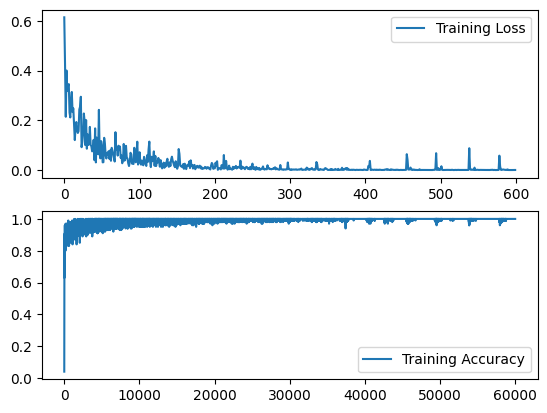

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Hyper-parameters
input_size = 784
hidden_size = 50
num_classes = 10
num_epochs = 100
batch_size = 100
learning_rate = 0.001

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        images = images.reshape(-1, 28*28)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch + 1, num_epochs, i + 1, total_step, loss.item(), (correct / total) * 100))
            loss_list.append(loss.item())

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

# Plot the training loss and accuracy
plt.subplot(2, 1, 1)
plt.plot(loss_list, label='Training Loss')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(acc_list, label='Training Accuracy')
plt.legend()
plt.show()
